In [13]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool
from scipy.interpolate import griddata

from susipop.susi.cache import SusiCache as cache
import susipop as sp

from tqdm import *

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

/home/vsivadas/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




In [14]:
def get_particle_pairs_at_timestep(dataset,t,gap= 1e-8):
    dataset.load_state(dataset.tlist[t])
    ball_positions = dataset.particles.r
    sim_chars = sp.susi.extract_sim_characteristics(dataset)
    sim_chars["gap"] = gap
    sim_chars = sp.susi.extract_sim_characteristics(dataset, **sim_chars)
    particle_pairs = sp.spatial.cluster_analysis.find_particle_pairs_cluster(ball_positions=ball_positions,**sim_chars)
    return particle_pairs
def largerst_cluster_size_vs_shearrate(dataset,t, gap=6.7e-8):
    dataset.load_state(dataset.tlist[t])
    s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=False)
    viscosity_file = pd.read_csv(dataset.dir+"/result/nu_t.dat")
    idx_t = np.where(viscosity_file[viscosity_file.columns[0]] == dataset.tlist[t])[0][0]
    viscosity = viscosity_file[viscosity_file.columns[2]][idx_t]
    max_cluster_size = max(s)/float(dataset.npart)
    shearstress = viscosity*dataset.config['experiment']['shearrate']['constant']['yd']
    return [max_cluster_size, shearstress, viscosity]

In [8]:
yd = 12.5
dataset = sp.reader.DataSet("rhor1_phi56_yd"+str(yd)+"/", particles = True, fluid=False)
# print dataset.dir
# viscosity_file = pd.read_csv(dataset.dir+"/result/nu_t.dat")
# viscosity = viscosity_file[viscosity_file.columns[2]][1:]
largerst_cluster_size_vs_shearrate(dataset,t=100, gap=1e-8)
# print viscosity_file.columns

[0.48034934497816595, 0.47195172204875002, 0.037756137763900001]

# Largest cluster vs shear stress in the system

[Errno 2] No such file or directory: 'rhor1_phi55_yd0.0/config.json'


  0%|          | 0/738 [00:00<?, ?it/s]

rhor1_phi55_yd1.0/


100%|██████████| 738/738 [04:25<00:00,  2.88it/s]


[Errno 2] No such file or directory: 'rhor1_phi55_yd2.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd3.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd4.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd5.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd6.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd7.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd8.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd9.0/config.json'


  0%|          | 0/990 [00:00<?, ?it/s]

rhor1_phi55_yd10.0/


100%|██████████| 990/990 [06:06<00:00,  2.65it/s]


[Errno 2] No such file or directory: 'rhor1_phi55_yd11.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd12.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd13.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd14.0/config.json'


  0%|          | 0/274 [00:00<?, ?it/s]

rhor1_phi55_yd15.0/


100%|██████████| 274/274 [01:43<00:00,  2.91it/s]


[Errno 2] No such file or directory: 'rhor1_phi55_yd16.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd17.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd18.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd19.0/config.json'


  0%|          | 0/498 [00:00<?, ?it/s]

rhor1_phi55_yd20.0/


100%|██████████| 498/498 [03:08<00:00,  2.77it/s]


[Errno 2] No such file or directory: 'rhor1_phi55_yd21.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd22.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd23.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd24.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd25.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd26.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd27.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd28.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd29.0/config.json'


  0%|          | 0/197 [00:00<?, ?it/s]

rhor1_phi55_yd30.0/


100%|██████████| 197/197 [01:14<00:00,  2.38it/s]


[Errno 2] No such file or directory: 'rhor1_phi55_yd31.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd32.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd33.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd34.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd35.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd36.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd37.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd38.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd39.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd40.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd41.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd42.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd43.0/config.json'
[Errno 2] No such file or directory: 'rhor1_phi55_yd44.0/config.json'
[Errno 2] No such fi

  0%|          | 1/509 [00:00<01:37,  5.18it/s]

rhor1_phi55_yd50.0/


100%|██████████| 509/509 [03:08<00:00,  2.87it/s]


<IPython.core.display.Javascript object>


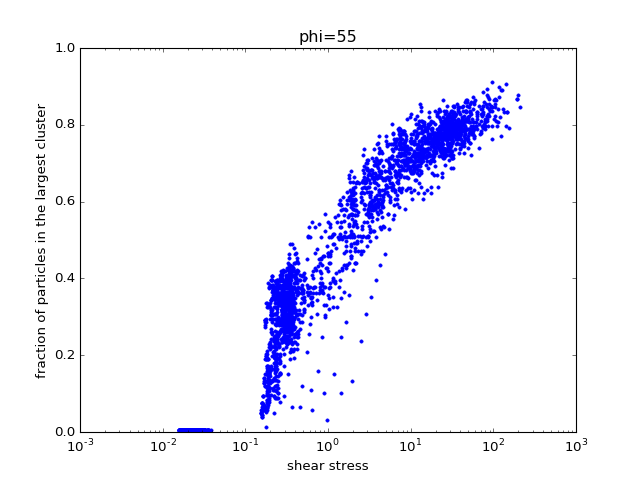

In [50]:
# ydlist =  [10.0,10.5,11.0,11.5,12.0,12.5,13.0,14.0,16.0,20.0,30.0]
ydlist = [float(i) for i in range(51)]
phi = 55
cluster_size_vs_shearstress = [[],[],[]]
for yd in ydlist:
    try:
        dataset = sp.reader.DataSet("rhor1_phi"+str(phi)+"_yd"+str(yd)+"/", particles = True, fluid=False)
        print dataset.dir
        viscosity_file = pd.read_csv(dataset.dir+"/result/nu_t.dat")
        viscosity = viscosity_file[viscosity_file.columns[2]][1:]
        for i in trange(1,len(viscosity)):
#         for i in trange(1,10):
            try:
                cluster_size_vs_shearstress[0].append(largerst_cluster_size_vs_shearrate(dataset, i)[0])
                cluster_size_vs_shearstress[1].append(largerst_cluster_size_vs_shearrate(dataset, i)[1])
                cluster_size_vs_shearstress[2].append(largerst_cluster_size_vs_shearrate(dataset, i)[2])
            except:
                continue
#         plt.figure()
# #         plt.ioff()
# #         plt.yscale("log")
#         plt.xscale("log")
#         plt.xlim([1e-3,1e3])
#         plt.ylim([0,1])
#         plt.title(dataset.dir)
#         plt.xlabel("shear stress")
#         plt.ylabel("fraction of particles in the largest cluster")
#         plt.plot(cluster_size_vs_shearstress[1],cluster_size_vs_shearstress[0],'.')
    except Exception as e:    
        print e
        continue
plt.figure()
#         plt.ioff()
#         plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-3,1e3])
plt.ylim([0,1])
# plt.title(dataset.dir)
plt.title("phi="+str(phi))
plt.xlabel("shear stress")
plt.ylabel("fraction of particles in the largest cluster")
plt.plot(cluster_size_vs_shearstress[1],cluster_size_vs_shearstress[0],'.')

<IPython.core.display.Javascript object>


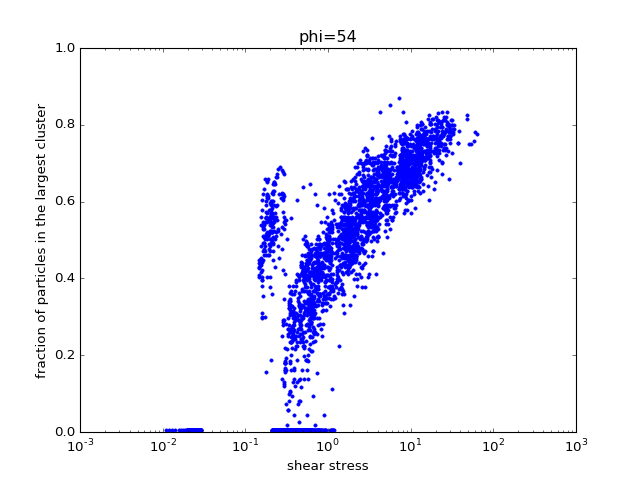

In [49]:
plt.figure()
#         plt.ioff()
#         plt.yscale("log")
plt.xscale("log")
plt.xlim([1e-3,1e3])
plt.ylim([0,1])
# plt.title(dataset.dir)
plt.title("phi="+str(phi))
plt.xlabel("shear stress")
plt.ylabel("fraction of particles in the largest cluster")
plt.plot(cluster_size_vs_shearstress[1],cluster_size_vs_shearstress[0],'.')

# Frictional pair interaction duration using sp.temporal.cluster_duration.bond_duration_distribution

In [48]:
phi = 56
yd = 12.0
path = "rhor1_phi"+str(phi)+"_yd+"+str(float(yd))+"/"
dataset = sp.reader.DataSet(, particles = True, fluid=False)
particle_pairs_in_time = []
for i in trange(len(dataset.tlist)):
    particle_pairs_in_time.append(get_particle_pairs_at_timestep(dataset,i))

SyntaxError: invalid syntax (<ipython-input-48-1d44e156e88b>, line 1)

<IPython.core.display.Javascript object>


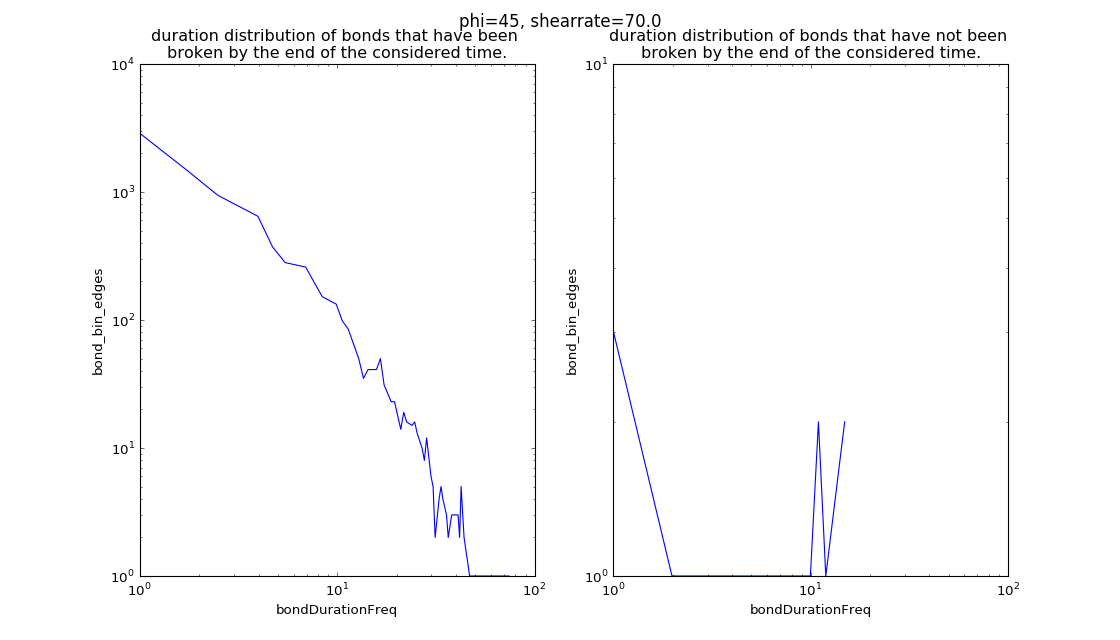

[  1.     1.98   9.96  10.94  11.92  14.86] [3 1 1 2 1 2]


In [45]:
histogram_bd  = dict(bins = 100)

ret = sp.temporal.cluster_duration.bond_duration_distribution(particle_pairs_in_time= particle_pairs_in_time, 
                                                              dt = 1.0,
                                                              histogram_bd = histogram_bd, normalize=False)
(bond_bin_edges, bondDurationFreq), (unbond_bin_edges, unbondDurationFreq) = ret
plt.figure(figsize=[14,8])
plt.suptitle("phi="+str(phi)+", shearrate="+str(yd),fontsize=15)
plt.subplot(121)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("bond_bin_edges")
plt.xlabel("bondDurationFreq")
plt.plot(bond_bin_edges, bondDurationFreq)
plt.title("duration distribution of bonds that have been \nbroken by the end of the considered time.")
plt.subplot(122)
plt.xscale("log")
plt.yscale("log")
plt.ylabel("bond_bin_edges")
plt.xlabel("bondDurationFreq")
plt.plot(unbond_bin_edges, unbondDurationFreq)
plt.title("duration distribution of bonds that have not been \nbroken by the end of the considered time.")
print unbond_bin_edges, unbondDurationFreq

In [ ]:
import cProfile
def fa(s):
    return np.exp(s**10)
def foo(a,b,s):
    x = 0
    for i in range(100):
        x += a +b + fa(s)
    return x

cProfile.run('foo(1,2,3)')